In [62]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest
%matplotlib inline

#### 실습 1. 기술 통계

In [63]:
mycars = pd.read_csv('/home/piai/PABA_27/BigData/01 실습파일/1 Big Data 분석 기초/mycars.csv')
mycars.head()

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact


In [64]:
# 요약통계량
mycars.describe().round(3)

,displacement,year,cylinder,mpg,highway_mileage
count,234.000,234.00,234.000,234.000,234.000
mean,3.472,2003.50,5.889,16.859,23.440
std,1.292,4.51,1.612,4.256,5.955
min,1.600,1999.00,4.000,9.000,12.000
25%,2.400,1999.00,4.000,14.000,18.000
50%,3.300,2003.50,6.000,17.000,24.000
75%,4.600,2008.00,8.000,19.000,27.000
max,7.000,2008.00,8.000,35.000,44.000


#### 실습 2. 기술 통계

In [65]:
df = mycars[['model', 'mpg']]
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [66]:
df = mycars[['model', 'highway_mileage']]
df.groupby('model').describe()

highway_mileage                                    \
                                 count       mean       std   min    25%   
model                                                                      
4runner 4wd                        6.0  18.833333  1.471960  17.0  17.50   
a4                                 7.0  28.285714  1.976047  26.0  26.50   
a4 quattro                         8.0  25.750000  1.164965  25.0  25.00   
a6 quattro                         3.0  24.000000  1.000000  23.0  23.50   
altima                             6.0  28.666667  2.422120  26.0  27.00   
c1500 suburban 2wd                 5.0  17.800000  2.167948  15.0  17.00   
camry                              7.0  28.285714  2.138090  26.0  26.50   
camry solara                       7.0  28.142857  2.193063  26.0  26.50   
caravan 2wd                       11.0  22.363636  2.062655  17.0  22.00   
civic                              9.0  32.555556  2.554952  29.0  32.00   
corolla                            5.0  34.000000  2.645751  30.0  33.00   
corvette                           5.0  24.800000  1.303840  23.0  24.00   
dakota pickup 4wd                  9.0  17.000000  2.291288  12.0  17.00   
durango 4wd                        7.0  16.000000  2.000000  12.0  15.50   
expedition 2wd                     3.0  17.333333  0.577350  17.0  17.00   
explorer 4wd                       6.0  18.000000  1.095445  17.0  17.00   
f150 pickup 4wd                    7.0  16.428571  0.786796  15.0  16.00   
forester awd                       6.0  25.000000  1.414214  23.0  24.25   
grand cherokee 4wd                 8.0  17.625000  3.248626  12.0  16.25   
grand prix                         5.0  26.400000  1.140175  25.0  26.00   
gti                                5.0  27.400000  2.302173  24.0  26.00   
impreza awd                        8.0  26.000000  0.755929  25.0  25.75   
jetta                              9.0  29.111111  6.071335  23.0  26.00   
k1500 tahoe 4wd                    4.0  16.250000  2.217356  14.0  14.75   
land cruiser wagon 4wd             2.0  16.500000  2.121320  15.0  15.75   
malibu                             5.0  27.600000  1.816590  26.0  26.00   
maxima                             3.0  25.333333  0.577350  25.0  25.00   
mountaineer 4wd                    4.0  18.000000  1.154701  17.0  17.00   
mustang                            9.0  23.222222  2.166667  20.0  22.00   
navigator 2wd                      3.0  17.000000  1.000000  16.0  16.50   
new beetle                         6.0  32.833333  7.626707  26.0  28.25   
passat                             7.0  27.571429  1.511858  26.0  26.00   
pathfinder 4wd                     4.0  18.000000  1.414214  17.0  17.00   
ram 1500 pickup 4wd               10.0  15.300000  1.888562  12.0  15.00   
range rover                        4.0  16.500000  1.732051  15.0  15.00   
sonata                             7.0  27.714286  2.058663  26.0  26.00   
tiburon                            7.0  26.000000  2.081666  24.0  24.00   
toyota tacoma 4wd                  7.0  19.428571  1.618347  17.0  18.50   

                                           
                         50%    75%   max  
model                                      
4runner 4wd             19.5  20.00  20.0  
a4                      29.0  29.50  31.0  
a4 quattro              25.0  26.25  28.0  
a6 quattro              24.0  24.50  25.0  
altima                  28.0  30.50  32.0  
c1500 suburban 2wd      17.0  20.00  20.0  
camry                   28.0  30.00  31.0  
camry solara            27.0  30.00  31.0  
caravan 2wd             23.0  24.00  24.0  
civic                   32.0  34.00  36.0  
corolla                 35.0  35.00  37.0  
corvette                25.0  26.00  26.0  
dakota pickup 4wd       17.0  19.00  19.0  
durango 4wd             17.0  17.00  18.0  
expedition 2wd          17.0  17.50  18.0  
explorer 4wd            18.0  19.00  19.0  
f150 pickup 4wd         17.0  17.00  17.0  
forester awd            25

In [67]:
count = mycars['model'].value_counts().sort_index()

# Cumcnt 계산 
cumcnt = np.cumsum(count)

# Percent 계산
percent = count / sum(count) * 100

# Cumpct 계산 
cumpct = np.cumsum(percent)

In [68]:
# DataFrame으로 취합    
count_data = pd.DataFrame({'Count':count, 'CumCnt':cumcnt, 'Percent':percent, 'CumPct':cumpct})
count_data.columns.name = 'model'
count_data

model,Count,CumCnt,Percent,CumPct
4runner 4wd,6,6,2.564103,2.564103
a4,7,13,2.991453,5.555556
a4 quattro,8,21,3.418803,8.974359
a6 quattro,3,24,1.282051,10.256410
altima,6,30,2.564103,12.820513
c1500 suburban 2wd,5,35,2.136752,14.957265
camry,7,42,2.991453,17.948718
camry solara,7,49,2.991453,20.940171
caravan 2wd,11,60,4.700855,25.641026
civic,9,69,3.846154,29.487179


 #### 실습 3. 정규 분포

In [69]:
# 누적확률값 계산
mu = 175
sigma = 5
x = 180
prob = stats.norm.cdf(x, mu, sigma)
print("나의 키가 180cm일 경우 {0:.1f}%에 위치함".format((1-prob)*100)) 

나의 키가 180cm일 경우 15.9%에 위치함


#### 실습 4. 정규 분포 

In [70]:
# 누적확률값 계산
mu = 12
sigma = 3
x1 = 9
x2 = 15

# prob1: 1리터를 가지고 9km 이상 15km 이하를 달릴 확률
prob1 = stats.norm.cdf(x2, mu, sigma) - stats.norm.cdf(x1, mu, sigma)

# prob2: 1리터를 가지고 15km 이상을 달릴 확률
prob2 = 1 - stats.norm.cdf(x2, mu, sigma)

print(f"9km 이상 15km 이하를 달릴 확률: {prob1:.4f}")
print(f"15km 이상을 달릴 확률: {prob2:.4f}")

9km 이상 15km 이하를 달릴 확률: 0.6827
15km 이상을 달릴 확률: 0.1587


#### 실습 5. t 분포

In [71]:
t = 2.0
df = 100 # 자유도 

# 누적 확률 값 
prob = stats.t.cdf(t, df)
print("P(T<=t):", prob)

P(T<=t): 0.9758939106344332


#### 실습 6. chi-square 분포

In [72]:
chisq = 3.0
df = 8

# 누적 확률 값 계산 
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq, prob))

P(X<=3.0): 0.0656


#### 실습 7. F 분포

In [128]:
f = 2.0
dfnum = 100 # 분자 자유도 
dfden = 10 # 분모 자유도 

# 누적 확률 값 계산
prob = stats.f.cdf(x=f, dfn=dfnum, dfd=dfden)
print("P(X<=F):", prob)

P(X<=F): 0.8863503911530736


#### 실습 8. 이항분포

In [74]:
# n의 수 
n = 5 

# 이항 분포
for i in range(n+1):
    prob = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i, prob))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


#### 실습 9. 정규성 검정

In [75]:
df = pd.read_csv('/home/piai/PABA_27/BigData/01 실습파일/1 Big Data 분석 기초/2sample_t_test.csv')
df.head()

,Mat_A,Mat_B
0,73.4,68.7
1,77.0,71.4
2,73.7,69.8
3,73.3,75.3
4,73.1,71.3


주어진 데이터가 정규 분포를 따르는지 여부를 검정하기 위해 Sharpiro-Wilk Test를 사용한다.

In [76]:
# 정규성 검정: Sharpiro-Wilk Test
# Mat_A
statistic, p = stats.shapiro(df['Mat_A'])
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.906264066696167, p-value=0.2563020884990692


In [77]:
# Mat_B
statistic, p = stats.shapiro(df['Mat_B'])
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.9729753732681274, p-value=0.9169775247573853


정규성 검정결과 p-value가 0.05보다 크므로 정규분포를 따른다고 할 수 있다. 

#### 실습 10. 추론 통계

- 모평균 구간추정 (모표준편차(\sigma)를 아는 경우) 

In [78]:
df = pd.DataFrame({'sample': [18, 18, 20, 21, 20, 23, 19, 18, 17, 21, 22, 20, 20, 21, 20, 19, 19, 18, 17, 19]})
df.head()

,sample
0,18
1,18
2,20
3,21
4,20


In [79]:
# 정규분포 구간 추정 함수 실행 
lower, upper = stats.norm.interval(0.95, loc=np.mean(df['sample']), scale=3.8/np.sqrt(20))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간: (17.83, 21.17)


#### 실습 11. 추론 통계

- 모평균 구간추정 (모표준편차(\sigma)를 모르는 경우) 

In [80]:
df = pd.DataFrame({'sample': [73, 71, 74, 69, 70, 73, 70, 68, 75, 72, 70, 72, 73, 70, 70, 72, 71, 70, 75, 72]})
df.head()

,sample
0,73
1,71
2,74
3,69
4,70


In [81]:
# 정규분포 구간 추정 함수 실행 
lower, upper = stats.t.interval(0.95, len(df)-1, loc=np.mean(df), scale=stats.sem(df))
print("신뢰구간: ({0}, {1})".format(lower.round(2), upper.round(2)))

신뢰구간: ([70.6], [72.4])


/home/piai/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


#### 실습 12. 1-Sample t-test

In [82]:
df = pd.DataFrame({'statisfaction': [85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
df.head()

,statisfaction
0,85.0
1,79.0
2,79.1
3,79.9
4,81.6


주어진 데이터가 정규 분포를 따르는지 여부를 검정하기 위해 Sharpiro-Wilk Test를 사용한다.

- 귀무가설(H0): 데이터가 정규분포를 따른다. 
- 대립가설(H1): 데이터가 정규분포를 따르지 않는다.  

Shapiro-Wilk Test: statistic=0.8473217487335205, p-value=0.0539751797914505


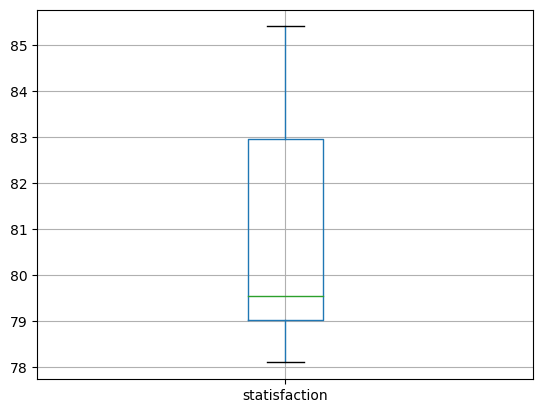

In [83]:
# boxplot
df.boxplot(['statisfaction'])

# 정규성 검정: Sharpiro-Wilk Test
statistic, p = stats.shapiro(df['statisfaction'])
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

p-valerk 0.054로 0.05보다 크기 때문에 귀무가설을 기각할 수 없다. 따라서, 이 데이터는 정규 분포를 따른다고 가정할 수 있다. 

그 다음 단계로, t-검정을 수행하여 개선활동이 고객만족도를 변화시켰는지 여부를 검정할 수 있다. 
- 귀무가설(H0): 개선활동이 만족도를 변화시키지 않았다. (평균은 78.0이다.)
- 대립가설(H1): 개선활동이 만족도를 변화시켰다. (평균은 78.0이 아니다.) 

In [84]:
# 1-Sample t-test
t_result = stats.ttest_1samp(df, 76.7)

# 1-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 1-Sample t-test의 t값 p값 출력
print("1-Sample t-test")
print("t 통계량: {}".format(t))
print("p-value: {}".format(p))

1-Sample t-test
t 통계량: [4.879]
p-value: [0.001]


p-value는 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택한다. 즉, 개선활동이 고객만족도를 변화시켰다고 결론을 내릴 수 있다. 

추가적으로, t-통계량이 양수이므로 표본 평균이 78.0보다 크다는 것도 알 수 있다. 

#### 실습 13. 2-Sample t-test

In [85]:
df = pd.DataFrame({'A' : [1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344],
                   'B' : [1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.800]})
df.head()

,A,B
0,1.883,1.435
1,1.715,1.572
2,1.799,1.486
3,1.768,1.511
4,1.711,1.457


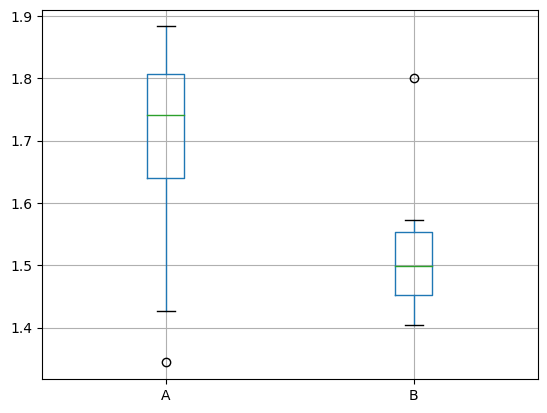

In [86]:
# Group별 boxplot 
df.boxplot(['A', 'B'])
plt.show()

boxplot을 통해 두 그룹 A와 B의 데이터 분포를 시각적으로 비교할 수 있다. 

주어진 데이터가 정규 분포를 따르는지 여부를 검정하기 위해 Sharpiro-Wilk Test를 사용한다.

- 귀무가설(H0): 데이터가 정규분포를 따른다. 
- 대립가설(H1): 데이터가 정규분포를 따르지 않는다. 

In [87]:
# 'A', 'B'의 정규성 검정: Shapiro-Wilk Test
statistic, p = stats.shapiro(df['A'])
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

statistic, p = stats.shapiro(df['B'])
print("Shapiro-Wilk Test: statistic={}, p-value={}".format(statistic, p))

Shapiro-Wilk Test: statistic=0.8425754904747009, p-value=0.08004532009363174
Shapiro-Wilk Test: statistic=0.8393934369087219, p-value=0.07424874603748322


두 그룹에 대해 각각의 정규성 검정 결과는 다음과 같다. 
- A그룹: p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다. 데이터는 정규분포를 따른다고 할 수 있다. 
- B그룹: 동일한 해석방법이 적용된다.

두 그룹의 분산이 동일한지(등분산성)를 확인하기 위해 Bartlett's test를 사용한다. 
- 귀무가설(H0): 두 그룹의 분산이 동일하다. 
- 대립가설(H1): 두 그룹의 분산이 다르다. 

In [88]:
# 등분산성 검정 
stats.bartlett(df['A'], df['B'])

BartlettResult(statistic=1.2899966318541203, pvalue=0.25604857136527204)

p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다. 두 그룹의 분산이 동일하다, 즉 등분산성을 띤다고 할 수 있다. 

정규성과 등분산성을 검정한 후, 두 그룹의 평균이 유의미하게 다른지를 확인하는 2-Sample t-test를 수행한다. 
- 귀무가설(H0): 공급자 간에 모평균에 차이가 없다. (평균이 동일하다.)
- 대립가설(H1): 공급자 간에 모평균에 차이가 있다. (평균이 다르다.) 

In [89]:
# 2-Sample t-test
t_result = stats.ttest_ind(df['A'], df['B'], equal_var=True)

# 2-Sample t-test의 t값 p값 저장
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

# 2-Sample t-test의 t값 p값 출력
print("2-Sample t-test")
print("t: {}".format(t))
print("p-value: {}".format(p))

2-Sample t-test
t: 1.94
p-value: 0.073


p-value는 0.05보다 크기 때문에 귀무가설을 기각할 수 없다. 즉, 공급자 간의 모평균에 차이가 있다고 할 수 없다. 

추가적으로, t-통계량이 양수이므로 A공급자가 B공급자보다 더 큰 모평균을 가지고 있다고 볼 수 있다. 

#### 실습 14. Paired t-test

In [90]:
df1 = pd.DataFrame({'before' : [720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2 = pd.DataFrame({'after': [710, 670, 790, 712, 810, 670, 790, 712, 790, 712]})

In [91]:
df1.head()

,before
0,720
1,589
2,780
3,648
4,720


In [92]:
df2.head()

,after
0,710
1,670
2,790
3,712
4,810


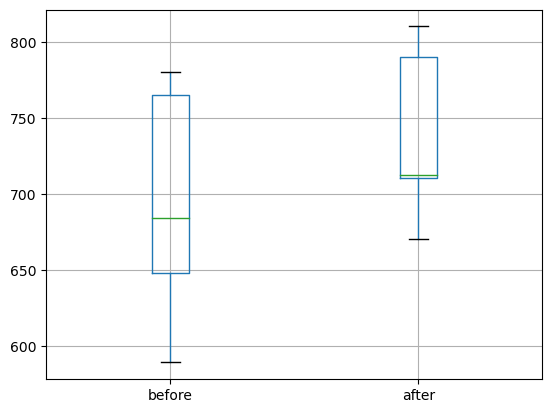

In [93]:
# 데이터 합치기
df = pd.concat([df1, df2], axis=1)

# Boxplot 
df.boxplot(['before', 'after'])
plt.show()

boxplot을 통해 학원 다니기 전후 영어 점수의 분포를 시작적으로 비교할 수 있다.

주어진 데이터가 정규 분포를 따르는지 여부를 검정하기 위해 Sharpiro-Wilk Test를 사용한다.

- 귀무가설(H0): 데이터가 정규분포를 따른다. 
- 대립가설(H1): 데이터가 정규분포를 따르지 않는다. 

In [94]:
# 'before'와 'after'의 정규성 검정: Shapiro-Wilk Test
stat_before, p_before = stats.shapiro(df['before'])
print("Shapiro-Wilk Test (Before): statistic={}, p-value={}".format(round(stat_before, 3), round(p_before, 3)))

stat_after, p_after = stats.shapiro(df['after'])
print("Shapiro-Wilk Test (After): statistic={}, p-value={}".format(round(stat_after, 3), round(p_after, 3)))

Shapiro-Wilk Test (Before): statistic=0.871, p-value=0.104
Shapiro-Wilk Test (After): statistic=0.847, p-value=0.054


전후 값에 대해 각각의 정규성 검정 결과는 다음과 같다. 
- before: p-value가 0.05보다 크므로 귀무가설을 기각할 수 없다. 데이터는 정규분포를 따른다고 할 수 있다. 
- after: 동일한 해석방법이 적용된다. 

정규성을 검정한 후, 두 관련  표본 간의 평균 차이를 비교하기 위해 Paired t-test를 수행한다. 
- 귀무가설(H0): 회사원들의 성적은 학원가기 전후에 대해 차이가 없다. 
- 대립가설(H1): 회사원들의 성적은 학원가기 전후에 대해 차이가 있다. 

In [95]:
# Paired t-test
t_result = stats.ttest_rel(df['before'], df['after'])

# t-test의 t값 p값 저장
t, p = round(t_result.statistic, 3), round(t_result.pvalue, 3)

# t-test의 t값 p값 출력
print("Paired t-test")
print("t: {}".format(t))
print("p-value: {}".format(p))

Paired t-test
t: -3.956
p-value: 0.003


p-value는 0.05보다 작기 때문에 귀무가설을 기각한다. 회사원들의 성적은 학원 가기 전후에 유의미한 차이가 있다. t-통계량이 음수이므로 after의 평균이 before의 평균보다 높다는 것을 의미한다. 

이는 학원 교육이 회사원들의 영어 성적을 유의미하게 향상시켰음을 시사한다. 

#### 실습 15. 1 Proportion test

이 가설은 양측 검정을 기반으로 한다. 즉, 성공 비율이 0.5와 다른지 여부를 검정한다. 
- 귀무가설(H0): P=0.5
- 귀무가설(H1): P!=0.5

In [97]:
count = 40
n_obs = 100
value = 0.5

In [99]:
# Proportion test 실행 
z, p = proportions_ztest(count, n_obs, value)

# Proportion test 결과 출력
print("1 Proportion test")
print("z: {0:0.3f}".format(z))
print("p: {0:0.3f}".format(p))

1 Proportion test
z: -2.041
p: 0.041


p-value 0.05보다 작으므로 귀무가설을 기각한다. 따라서, 모집단에서의 성공비율은 0.5가 아니다. 또한, z 통계량이 음수이므로 표본 비율이 귀무가설 하의 모집단 비율보다 작다는 것을 의미한다. 

#### 실습 16. 2 Proportion test

두 공장의 불량률이 같은지 여부를 검정한다. 
- 귀무가설(H0): P1=P2 (두 공장의 불량률은 같다.)
- 대립가설(H1): P1!=P2 (두 공장의 불량률은 다르다.)

In [100]:
N1 = 1200
X1 = 14
N2 = 1200
X2 = 5

In [101]:
# Proportion test 실행
count = [X1, X2]
n_obs = [N1, N2]

z, p = proportions_ztest(count, n_obs)


# Proportion test 결과 출력
print("2 Proportion test")
print("z: {0:0.3f}".format(z))
print("p-value: {0:0.3f}".format(p))

2 Proportion test
z: 2.073
p-value: 0.038


p-value 0.05보다 작으므로 귀무가설을 기각한다. 따라서, 두 공장의 불량룰은 같지 않다. 추가적으로, z-통계량이 양수이므로 공장 A의 불량률이 공장 B의 불량률보다 높다는 것을 알 수 있다. 

#### 실습 17. chi-square test

- 귀무가설(H0): 그룹별로 빈도 차이가 없다. (관찰된 빈도와 기대 빈도 간의 차이가 없다.)
- 대립가설(H1): 그룹별로 빈도 차이가 있다. (관찰된 빈도와 기대 빈도 간의 차이가 있다.)

In [112]:
df = pd.DataFrame({'A' : [18, 1, 8, 7, 10, 9, 10], 'B' : [8, 2, 14, 5, 5, 9, 4],
                    'C' : [4, 1, 3, 4, 9, 5, 4], 'D' : [4, 1, 2, 3, 2, 7, 3],
                    'E' : [3, 1, 3, 1, 1, 1, 1], 'F' : [3, 25, 8, 10, 2, 1, 7]})
df.head()

,A,B,C,D,E,F
0,18,8,4,4,3,3
1,1,2,1,1,1,25
2,8,14,3,2,3,8
3,7,5,4,3,1,10
4,10,5,9,2,1,2


In [113]:
# chi square test 실행
chi, p, dof, expected = stats.chi2_contingency(df)

# chi square test 결과 출력
print("chi-square test")
print("chisq: {0:0.3f}".format(chi))
print("p: {0:0.3f}".format(p))
print("degree pf freedom: {}".format(dof)) # 자유도
print("expected value: \n{}".format(expected)) # 기대값

chi-square test
chisq: 98.274
p: 0.000
degree pf freedom: 30
expected value: 
[[11.00436681  8.20960699  5.24017467  3.84279476  1.92139738  9.78165939]
 [ 8.52838428  6.36244541  4.06113537  2.97816594  1.48908297  7.58078603]
 [10.45414847  7.79912664  4.97816594  3.65065502  1.82532751  9.29257642]
 [ 8.25327511  6.15720524  3.930131    2.88209607  1.44104803  7.33624454]
 [ 7.97816594  5.95196507  3.79912664  2.7860262   1.3930131   7.09170306]
 [ 8.80349345  6.56768559  4.19213974  3.07423581  1.5371179   7.82532751]
 [ 7.97816594  5.95196507  3.79912664  2.7860262   1.3930131   7.09170306]]


p-value가 유의수준보다 작으므로 귀무가설을 기각한다. 따라서, 그룹별로 빈도에 유의미한 차이가 있다고 볼 수 있다. 카이제곱 검정 통게량은 관찰된 빈도와 기대 빈도 간의 차이가 얼마나 큰지를 나타낸다. 

- 자유도: 행과 열의 개수에 따라 결정된다.  
- 기댓값: 기대값 행렬은 관찰된 빈도가 실제로 기대되는 빈도와 어떻게 다른지 보여준다. 

#### 실습 18. ANOVA

In [122]:
df = pd.read_csv('/home/piai/PABA_27/BigData/01 실습파일/1 Big Data 분석 기초/ANOVA.csv')
df.head()

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      24 non-null     float64
 1   charge    24 non-null     object 
 2   gangjong  24 non-null     object 
 3   type      24 non-null     object 
dtypes: float64(1), object(3)
memory usage: 896.0+ bytes


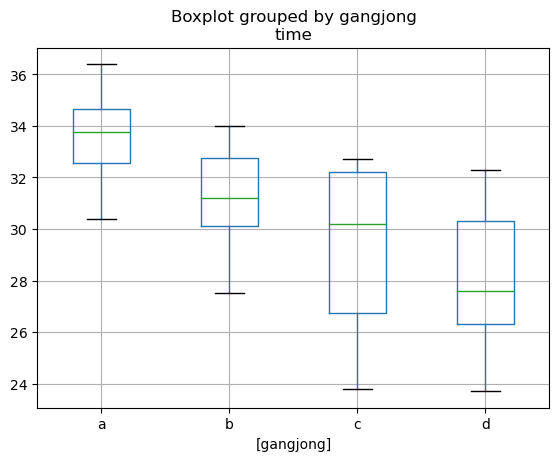

In [124]:
# Group별 boxplot
# 강종별 시간 분포
df.boxplot(['time'], by=['gangjong'])
plt.show()

강종별 시간, 비용별 시간에 대해 ANOVA 분석을 진행하기 위해 데이터를 추출하여 새로 데이터 프레임을 생성한다. 

In [127]:
# 강종별 데이터 추출
Gangjong_A = df[df['gangjong'] == 'a']['time'].reset_index(drop=True)
Gangjong_B = df[df['gangjong'] == 'b']['time'].reset_index(drop=True)
Gangjong_C = df[df['gangjong'] == 'c']['time'].reset_index(drop=True)
Gangjong_D = df[df['gangjong'] == 'd']['time'].reset_index(drop=True)


df1 = pd.DataFrame({'Gangjong_A': Gangjong_A, 'Gangjong_B': Gangjong_B, 'Gangjong_C': Gangjong_C, 'Gangjong_D': Gangjong_D})
df1.head()

,Gangjong_A,Gangjong_B,Gangjong_C,Gangjong_D
0,32.2,33.1,32.6,26.7
1,30.4,29.9,32.7,28.5
2,33.6,31.7,29.3,30.9
3,36.4,27.5,25.9,26.2
4,33.9,34.0,31.1,32.3


boxplot을 통해 비용별 시간의 분포를 시각적으로 비교할 수 있다. 

강종별 ANOVA 분석을 위한 가설은 다음과 같다. 
- 귀무가설(H0): 강종별 시간의 평균에는 차이가 없다. 
- 대립가설(H1): 적어도 하나의 강종의 평균 시간은 다른 강종의 평균 시간과 차이가 있다. 

In [133]:
# ANOVA 실행
f_result = stats.f_oneway(df1['Gangjong_A'], df1['Gangjong_B'], df1['Gangjong_C'], df1['Gangjong_D'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

# ANOVA 결과 출력
print("One-way ANOVA")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

One-way ANOVA
F 통계량: 4.172
p-value: 0.019


p-value가 0.05보다 작으므로 귀무가설을 기각한다. 이는 그룹 간 평균의 차이가 통계적으로 유의미하다는 것을 의미한다. 

즉, 강종에 따라 시간에 차이가 있음을 알 수 있다. 

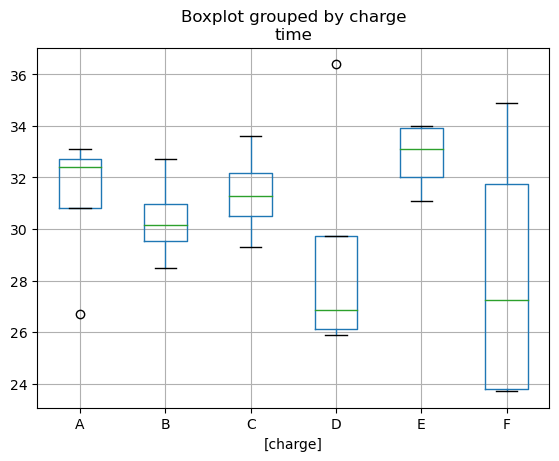

In [111]:
# Group별 boxplot
# 비용별 시간 분포
df.boxplot(['time'], by=['charge'])
plt.show()

In [130]:
# 비용별 데이터 추출 
Charge_A = df[df['charge'] == 'A']['time'].reset_index(drop=True)
Charge_B = df[df['charge'] == 'B']['time'].reset_index(drop=True)
Charge_C = df[df['charge'] == 'C']['time'].reset_index(drop=True)
Charge_D = df[df['charge'] == 'D']['time'].reset_index(drop=True)
Charge_E = df[df['charge'] == 'E']['time'].reset_index(drop=True)
Charge_F = df[df['charge'] == 'F']['time'].reset_index(drop=True)

df2 = pd.DataFrame({'Charge_A': Charge_A, 'Charge_B': Charge_B, 'Charge_C': Charge_C, 'Charge_D': Charge_D, 'Charge_E': Charge_E, 'Charge_F': Charge_F})
df2.head()

,Charge_A,Charge_B,Charge_C,Charge_D,Charge_E,Charge_F
0,32.2,30.4,33.6,36.4,33.9,34.9
1,33.1,29.9,31.7,27.5,34.0,30.7
2,32.6,32.7,29.3,25.9,31.1,23.8
3,26.7,28.5,30.9,26.2,32.3,23.7


강종별 ANOVA 분석을 위한 가설은 다음과 같다. 
- 귀무가설(H0): 비용별 시간의 평균에는 차이가 없다. 
- 대립가설(H1): 적어도 하나의 비용의 평균 시간은 다른 강종의 평균 시간과 차이가 있다. 

In [132]:
# ANOVA 실행
f_result = stats.f_oneway(df2['Charge_A'], df2['Charge_B'], df2['Charge_C'], df2['Charge_D'], df2['Charge_E'], df2['Charge_F'])

f, p = f_result.statistic.round(3), f_result.pvalue.round(3)

# ANOVA 결과 출력
print("One-way ANOVA")
print("F 통계량: {}".format(f))
print("p-value: {}".format(p))

One-way ANOVA
F 통계량: 0.918
p-value: 0.491


p-value가 0.05보다 크므로 귀무가설을 채택한다. 이는 그룹 간 평균의 차이가 통계적으로 유의미하지않다는 것을 의미한다. 

즉, 비용에 따라 시간에 유의미한 차이가 존재하지 않는다. 

이를 통해, 강종이 시간에 영향을 미치는 중요한 요인임을, 비용은 그렇지 않음을 알 수 있다 

#### 실습 19. Correlation Analysis

In [115]:
df1 = [37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2 = [14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

In [117]:
# Correlation Analysis 실행 
corr, pval = stats.pearsonr(df1, df2)

# Correlation, p-value 결과 출력 
print("Correlation Analysis")
print("corr: {0:0.3f}".format(corr))
print("p-value: {0:0.3f}".format(pval))

Correlation Analysis
corr: -0.723
p-value: 0.000


상관 계수 r는 -1에서 1사이의 값을 가지며, 두 변수 간의 선형관계의 강도를 나타낸다. 해당 분석 결과는 두 변수 간에 강한 음의 상관 관계가 있음을 나타낸다. 즉, 하나의 변수가 증가할 때 다른 변수는 감소하는 경향이 강하다는 것을 의미한다. 

p-값은 상관 계수가 우연히 나타날 확률을 나타낸다. p-값은 0.000은 매우 낮은 값을 가지므로, 상관 계수가 통계적으로 유의미하다는 것을 의미한다. 